In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

from MopsTracker import MopsTracker
from MopsParameters import MopsParameters

% matplotlib inline

In [2]:
dbname = '../fullsky5year.db'

In [3]:
con = sql.connect(dbname)

In [4]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 10000
""", con)

/Users/joachim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


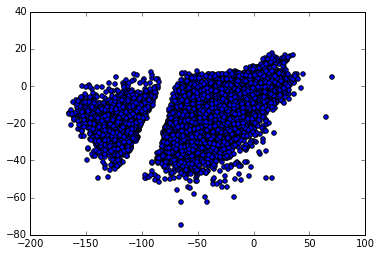

In [5]:
fig, ax = plt.subplots(1,1)
full.ra[full.ra > 180] -= 360
ax.scatter(np.array(full.ra), np.array(full.dec));
fig.savefig("full.jpg")

In [6]:
mjd = [51029,51065]
ra = [220,222]
dec = [-10,-8]
nights = mjd[1]-mjd[0]

In [7]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [8]:
len(ssmids['ssmid'])

604

In [9]:
obj_num = 500

In [10]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [11]:
print sample

(3404958, 9107805, 1388986, 3628947, 4853784, 2956714, 713345, 2091716, 9229943, 3643416, 1898320, 7055413, 289803, 7342919, 656146, 3917815, 10172314, 9632920, 6299707, 6607145, 5327286, 7622906, 8472127, 8441879, 7994494, 9915223, 5227173, 4303523, 9906665, 1643987, 5265759, 8933219, 3054766, 5967500, 3701272, 4711125, 434767, 8319757, 520680, 2753628, 5669535, 6646679, 4770877, 1786567, 371718, 8348309, 2412610, 702946, 2697180, 5608690, 9892660, 7589859, 5892461, 10725709, 5786246, 8641119, 1385119, 6192926, 8602125, 7801143, 5988971, 6056917, 582606, 8558244, 10105668, 1960821, 4165242, 2762642, 9689406, 2214610, 9576422, 1418831, 9876147, 648822, 7244412, 7880031, 329961, 1130627, 8213901, 492744, 4214191, 6718630, 2294006, 8414297, 6368439, 6696592, 10710692, 1795936, 3166315, 9798409, 3532776, 4996955, 8731874, 802856, 10200885, 2322638, 9353591, 10082584, 2102241, 9774181, 9077521, 3904734, 7275036, 6561881, 5214443, 10719963, 9498263, 6313026, 8548425, 7773329, 1053806, 91793

In [12]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s AND (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (sample, mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [13]:
objs

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,31612,88648468,328244,220.392224,-8.882625,51029.024703,18.748185,59.579367
1,31667,88648468,1884764,220.897461,-8.415979,51029.024703,21.408838,5.138481
2,31675,88648468,2065004,220.386568,-8.394551,51029.024703,20.229388,15.227012
3,31684,88648468,2267056,220.702795,-8.202540,51029.024703,20.235010,15.148378
4,31687,88648468,2397307,220.684421,-8.460451,51029.024703,20.674004,10.110404
5,31697,88648468,2750190,220.636733,-8.313947,51029.024703,20.744450,9.475232
6,31707,88648468,3108326,220.140109,-9.055528,51029.024703,21.243076,5.986038
7,31731,88648468,3917815,220.203772,-8.702103,51029.024703,21.317978,5.586999
8,31743,88648468,4214191,220.635957,-8.626909,51029.024703,20.618857,10.637201
9,31788,88648468,5513004,220.386185,-8.082705,51029.024703,20.825044,8.797363


In [14]:
objs.to_csv("sampledata.txt", sep=" ", header=False, index=False)

In [15]:
HW = 0.00005
HL = 0.00005
A = 0.05

def _plotprettymaker(fig, ax):
    ax.set_xlabel("RA", size=16);
    ax.set_ylabel("DEC", size=16);
    fig.set_size_inches(10,7);
    ax.set_xlim(ra[0],ra[1])
    ax.set_ylim(dec[0],dec[1]);
    ax.set_title("Random Selection: %i objects, %s nights" % (obj_num, nights), size=20)

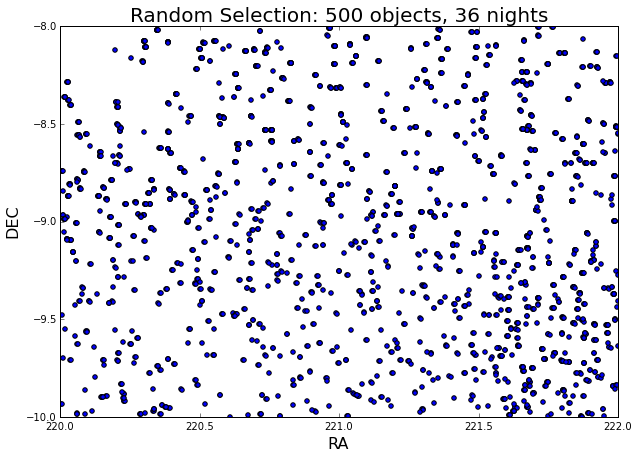

In [16]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec));
fig.savefig("data.jpg")

In [17]:
! rm -rf nightly/
! rm -rf obshist/
! mkdir nightly
! mkdir obshist

In [18]:
! python $MOPS_DIR/bin/splitByNight.py sampledata.txt nightly obshist

In [19]:
! rm -rf samplerun/

In [20]:
! python ../runMops.py nightly samplerun 

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [21]:
parameters = yaml.load(file('/Users/joachim/repos/neosim/mopsPresentation/samplerun/parameters.yaml','r'))
tracker = yaml.load(file('/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracker.yaml','r'))

/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51029.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51030.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51031.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51032.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51034.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51035.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51042.tracklets
/Users/joachim/repos/neosim/mopsPresentation/samplerun/tracklets/51048.tracklets


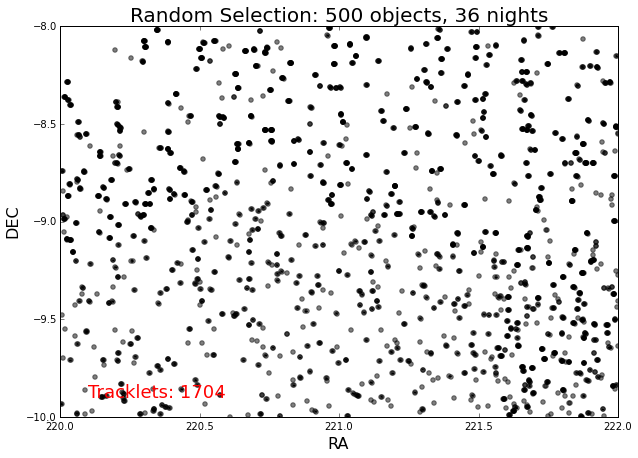

In [22]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)

ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.tracklets:
    print filein
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        
        p1 = objs[objs['diaid'] == tracklets[0]]
        p2 = objs[objs['diaid'] == tracklets[1]]
        
        dRa = float(p2['ra'])-float(p1['ra'])
        dDec = float(p2['dec'])-float(p1['dec'])
        if  np.sqrt(dRa**2 + dDec**2) > 0.5:
            ax.arrow(float(p1['ra']), float(p1['dec']), dRa, dDec,
                head_width=HW, head_length=HL, fc='r', ec='r')
            print tracklets
        else:
            ax.arrow(float(p1['ra']), float(p1['dec']), dRa, dDec,
                head_width=HW, head_length=HL, fc='k', ec='k')

ax.text(ra[0]+0.1, dec[0]+0.1, 'Tracklets: ' + str(tracklet_num), size=18, color='r')
fig.savefig("tracklets.jpg")

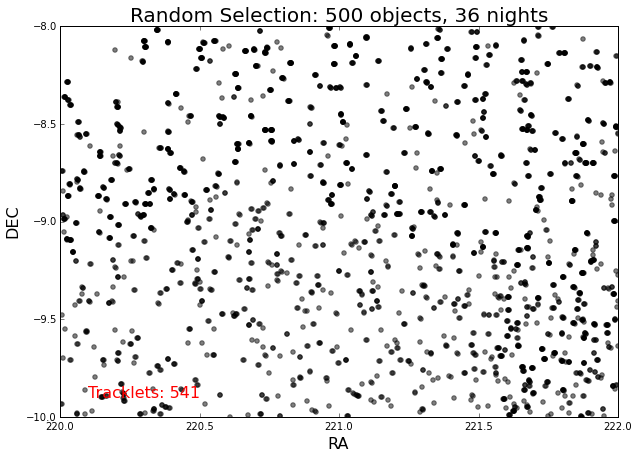

In [23]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.collapsedTrackletsById:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        
        p1 = objs[objs['diaid'] == tracklets[0]]
        p2 = objs[objs['diaid'] == tracklets[-1]]
        
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
               head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)

ax.text(ra[0]+0.1, dec[0]+0.1, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("collapsed.jpg")

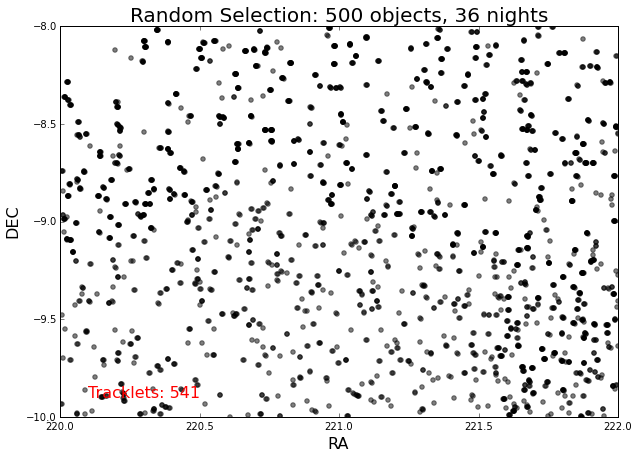

In [24]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.purifiedTrackletsById:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        
        p1 = objs[objs['diaid'] == tracklets[0]]
        p2 = objs[objs['diaid'] == tracklets[-1]]
        
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
                head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(ra[0]+0.1, dec[0]+0.1, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("purified.jpg")

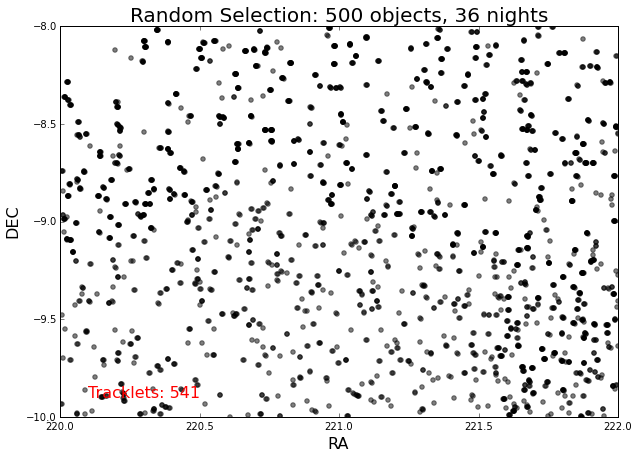

In [25]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.finalTrackletsById:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        
        p1 = objs[objs['diaid'] == tracklets[0]]
        p2 = objs[objs['diaid'] == tracklets[-1]]
        
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
                head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(ra[0]+0.1, dec[0]+0.1, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("final.jpg")

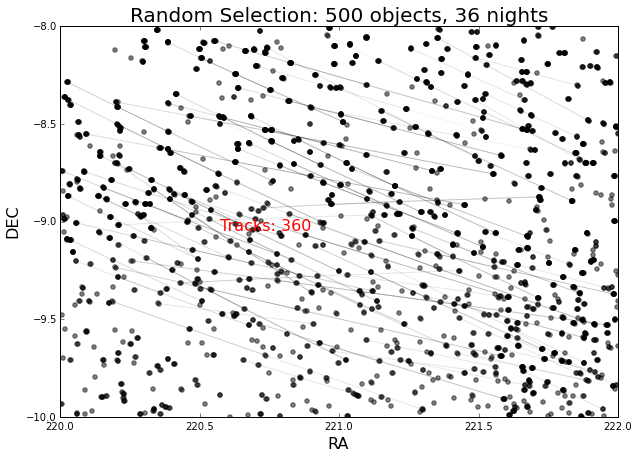

In [26]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

track_num = 0

for filein in tracker.tracks:
    for line in open(filein, 'r'):
        track = np.fromstring(line, sep=" ", dtype=int)
        track_num += 1
        ra = []
        dec = []
        
        for d in track:
            ra.append(float(objs.loc[objs['diaid'] == d]['ra']))
            dec.append(float(objs.loc[objs['diaid'] == d]['dec']))
            
        ax.plot(ra, dec, color='k', alpha=A)
        
ax.text(ra[0]+0.1, dec[0]+0.1, 'Tracks: ' + str(track_num), size=16, color='r')
fig.savefig("tracks.jpg")